## P5-Sepsis-Prediction: Buiding classification model to predict Sepsis

### Business Understanding

##### `Project Overview`
The primary objective of the "P5 Sepsis Prediction" project is to develop a robust machine learning model that predicts the likelihood of sepsis in ICU patients. Sepsis is a life-threatening condition caused by the body's response to infection, and early detection is critical for patient survival. By embedding the predictive model in an API, we aim to provide healthcare providers with a powerful tool for real-time sepsis prediction, enhancing decision-making and patient outcomes.


##### `Project Goal`
Build a classification Model to predict the likelihhood of sepsis in ICU patients.


##### `Business Objectives`
- Early Detection of Sepsis: Improve patient outcomes by predicting sepsis early, enabling timely intervention and treatment.
- Enhanced Clinical Decision Support: Provide healthcare professionals with actionable insights through an easily integrable API, supporting clinical decisions in real-time.
- Optimized Resource Allocation: Help healthcare facilities optimize the allocation of resources by identifying high-risk patients who may require intensive monitoring and care.


##### `Source of Data`
The dataset provided for this project is a modified version of a publicly available data source from Johns Hopkins University from Kaggle. It includes various patient attributes and their corresponding sepsis status. The dataset is subject to strict usage restrictions and can only be used for the purpose of this assignment.


##### `Key Stakeholders`
- Healthcare Providers: Doctors, nurses, and other medical staff who will use the sepsis prediction API to make informed clinical decisions.
- Hospital Administrators: Individuals responsible for resource management and policy implementation in healthcare facilities.
- Data Scientists and Developers: Team members involved in the development, training, and deployment of the machine learning model and API.


##### `Success Criteria`
- Accuracy: The model's should obtain an accuracy of 85% or higher.
- Precision and Recall:The final model should maintain both Precision and Recall scores of 0.75 or above.
- F1 Score: The final model should attain an F1 score of 0.75 to 0.85 or higher according to state-of-the-art SOTA models
Area Under the Receiver Operating Characteristic Curve (AUC-ROC): According to the state-of-the-art SOTA models for sepsis prediction should achieve AUC-ROC scores in the range of 0.85 to 0.90 or higher.


##### `Data Dictionary`

| Column Name       | Attribute/Target | Data Type | Description                                                                                 |
|-------------------|------------------|------------|---------------------------------------------------------------------------------------------|
| **ID**            | N/A              | Integer    | Unique identifier for each patient.                                                         |
| **PRG**           | Attribute        | Float      | Plasma glucose: Measurement of plasma glucose levels.                                       |
| **PL**            | Attribute        | Float      | Blood Work Result-1: Blood work result in mu U/ml.                                          |
| **PR**            | Attribute        | Float      | Blood Pressure: Measurement of blood pressure in mm Hg.                                     |
| **SK**            | Attribute        | Float      | Blood Work Result-2: Blood work result in mm.                                               |
| **TS**            | Attribute        | Float      | Blood Work Result-3: Blood work result in mu U/ml.                                          |
| **M11**           | Attribute        | Float      | Body Mass Index: BMI calculated as weight in kg/(height in m)^2.                            |
| **BD2**           | Attribute        | Float      | Blood Work Result-4: Blood work result in mu U/ml.                                          |
| **Age**           | Attribute        | Integer    | Age: Age of the patient in years.                                                           |
| **Insurance**     | N/A              | Boolean    | Insurance: Indicates whether the patient holds a valid insurance card.                      |
| **Sepssis**        | Target           | Boolean    | Sepsis: Target variable indicating whether the patient will develop sepsis (Positive) or not (Negative). |


##### `Hypothesis Statement`
`Null Hypothesis (Ho)`: There is no correlation between old age and individual's likelihood of developing sepssis.
`Altenatenate Hypothesis (Ha)`: There is a statistically significant correlation between old age and individual's likelihood of developing sepssis.


##### `Analytical Questions`
1. Are elderly people at a higher risk of developing sepssis compared to younger individuals?
2. Are patients with a high BMI at a greater risk of developing sepssis?
3. Are patients with high blood pressure at a greater risk of developing sepssis?
4. Does higher plasma glucose increase the likelihood of developing sepssis?
5. Are patients with higher insurance coverage at a greater risk of developing sepssis?

 


### Data Understanding

#### Importations

In [100]:
# Data Manipulation Libraries
import pandas as pd
import numpy as np

# Data Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.decomposition import PCA

# Statistics libraries
from scipy.stats import spearmanr


# Machine Learning Libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler,StandardScaler,LabelEncoder,FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Utility libraries
import warnings
warnings.filterwarnings("ignore")

# Define custom color palette
custom_palette = {"Positive":"Blue","Negative":"Orange"}

#### Data Loading

In [2]:
# load the csv data
df = pd.read_csv("../data/Paitients_Files_Train.csv")

#### Exploratory Data Analysis

In [3]:
# load first five rows of data
df.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [4]:
# load last row of data
df.tail()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative
598,ICU200608,1,173,74,0,0,36.8,0.088,38,1,Positive


In [5]:
# Rename columns in Dataset
new_col_names = {
    "PRG":"Plasma_Glucose",
    "PL":"Blood_Work_Result_1",
    "PR":"Blood_Pressure",
    "SK":"Blood_Work_Result_2",
    "TS":"Blood_Work_Result_3",
    "M11":"Body_Mass_Index",
    "BD2":"Blood_Work_Result_4",
}

df.rename(columns = new_col_names,inplace=True)

In [6]:
# confirm changes
df.head()

,ID,Plasma_Glucose,Blood_Work_Result_1,Blood_Pressure,Blood_Work_Result_2,Blood_Work_Result_3,Body_Mass_Index,Blood_Work_Result_4,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [7]:
# Drop the ID column
df.drop("ID",axis=1, inplace=True)

In [8]:
# check the shape of the dataframe
df.shape

(599, 10)

In [9]:
# perform descriptive statistics on data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Plasma_Glucose,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
Blood_Work_Result_1,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
Blood_Pressure,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
Blood_Work_Result_2,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
Blood_Work_Result_3,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
Body_Mass_Index,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
Blood_Work_Result_4,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


##### Key Observations
- The average plasma glucose level of the patients is 3.825 mg/dL, with min = 0.00 mg/dL and max = 17.0 mg/dL
- The average plasma glucose level of 3.825 and median of 3.0 might suggest a bell-shape distribution with some skewness in the data.
- The blood work results will be researched further.
- The average blood pressure of a patient is 68.73 mm Hg, median of 70.00 mm Hg and the min and max blood pressures measure are 0.00 mm Hg and 122.00 mm Hg
- 25% of the patients have blood pressure levels below 99.00 mm Hg and 75% has their blood pressures below 140.00 mm Hg suggessting low blood among the patients.
- The average BMI of a patient is 31.92, a standard deviation of 8.00, a mean of 32, min BMI of 0 and a max BMI of 67.10.
- From the observation that 25% of ICU patients have a BMI below 27.10 and 75% have a BMI below 36.55, we can conclude that a large portion of the ICU population falls into the overweight and obese categories. This highlights the need for specialized care and interventions to manage sepsis risks and complications in these patients.
- The min age distribution of the patient population is 21 years and the max age is 81 years.
- The average of the patients is around 33years and a median age of 29 years.

In [10]:
# check the info about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Plasma_Glucose       599 non-null    int64  
 1   Blood_Work_Result_1  599 non-null    int64  
 2   Blood_Pressure       599 non-null    int64  
 3   Blood_Work_Result_2  599 non-null    int64  
 4   Blood_Work_Result_3  599 non-null    int64  
 5   Body_Mass_Index      599 non-null    float64
 6   Blood_Work_Result_4  599 non-null    float64
 7   Age                  599 non-null    int64  
 8   Insurance            599 non-null    int64  
 9   Sepssis              599 non-null    object 
dtypes: float64(2), int64(7), object(1)
memory usage: 46.9+ KB


In [11]:
# Check for nulls
df.isna().sum().sum()

np.int64(0)

In [12]:
# check for duplicates 
df.duplicated().sum()

np.int64(0)

#### Univariate Analysis

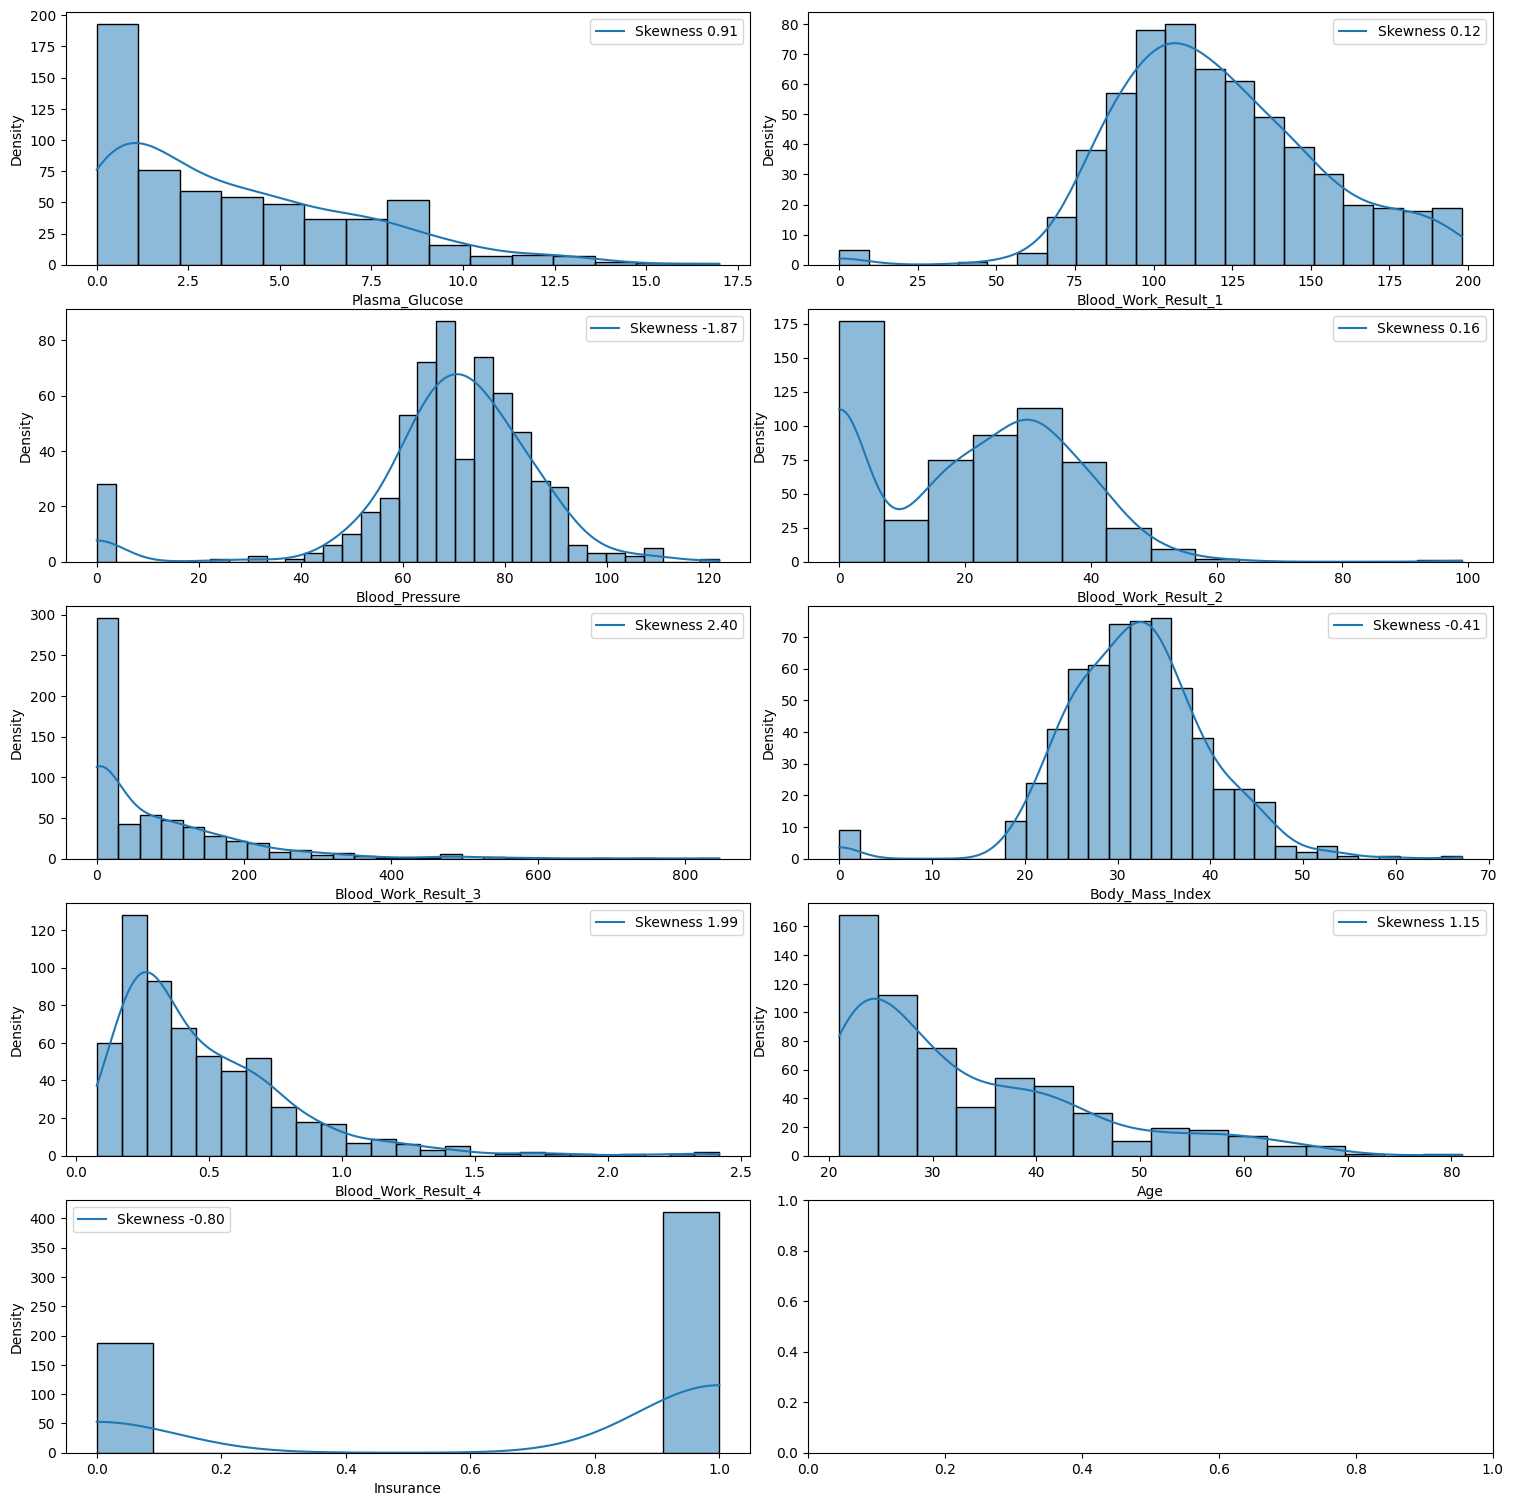

In [13]:
# set the number of rows and columns for subplot
num_rows, num_columns = 5,2
fig,axes =plt.subplots(num_rows,num_columns,figsize=(15,15))
fig.tight_layout()

# flatten axes
axes = axes.flatten()
for id,column in enumerate(df.columns):
    if df[column].dtype in ['int64','float64']:
        sns.histplot(df[column], ax=axes[id], kde=True)
        skewness = df[column].skew()
        axes[id].legend([f"Skewness {skewness:.2f}"])
        # axes[id].set_title(f"Histogram of {column}")
        axes[id].set_ylabel("Density")
plt.show()

#### Box Plot Visualizations To Check for Outliers

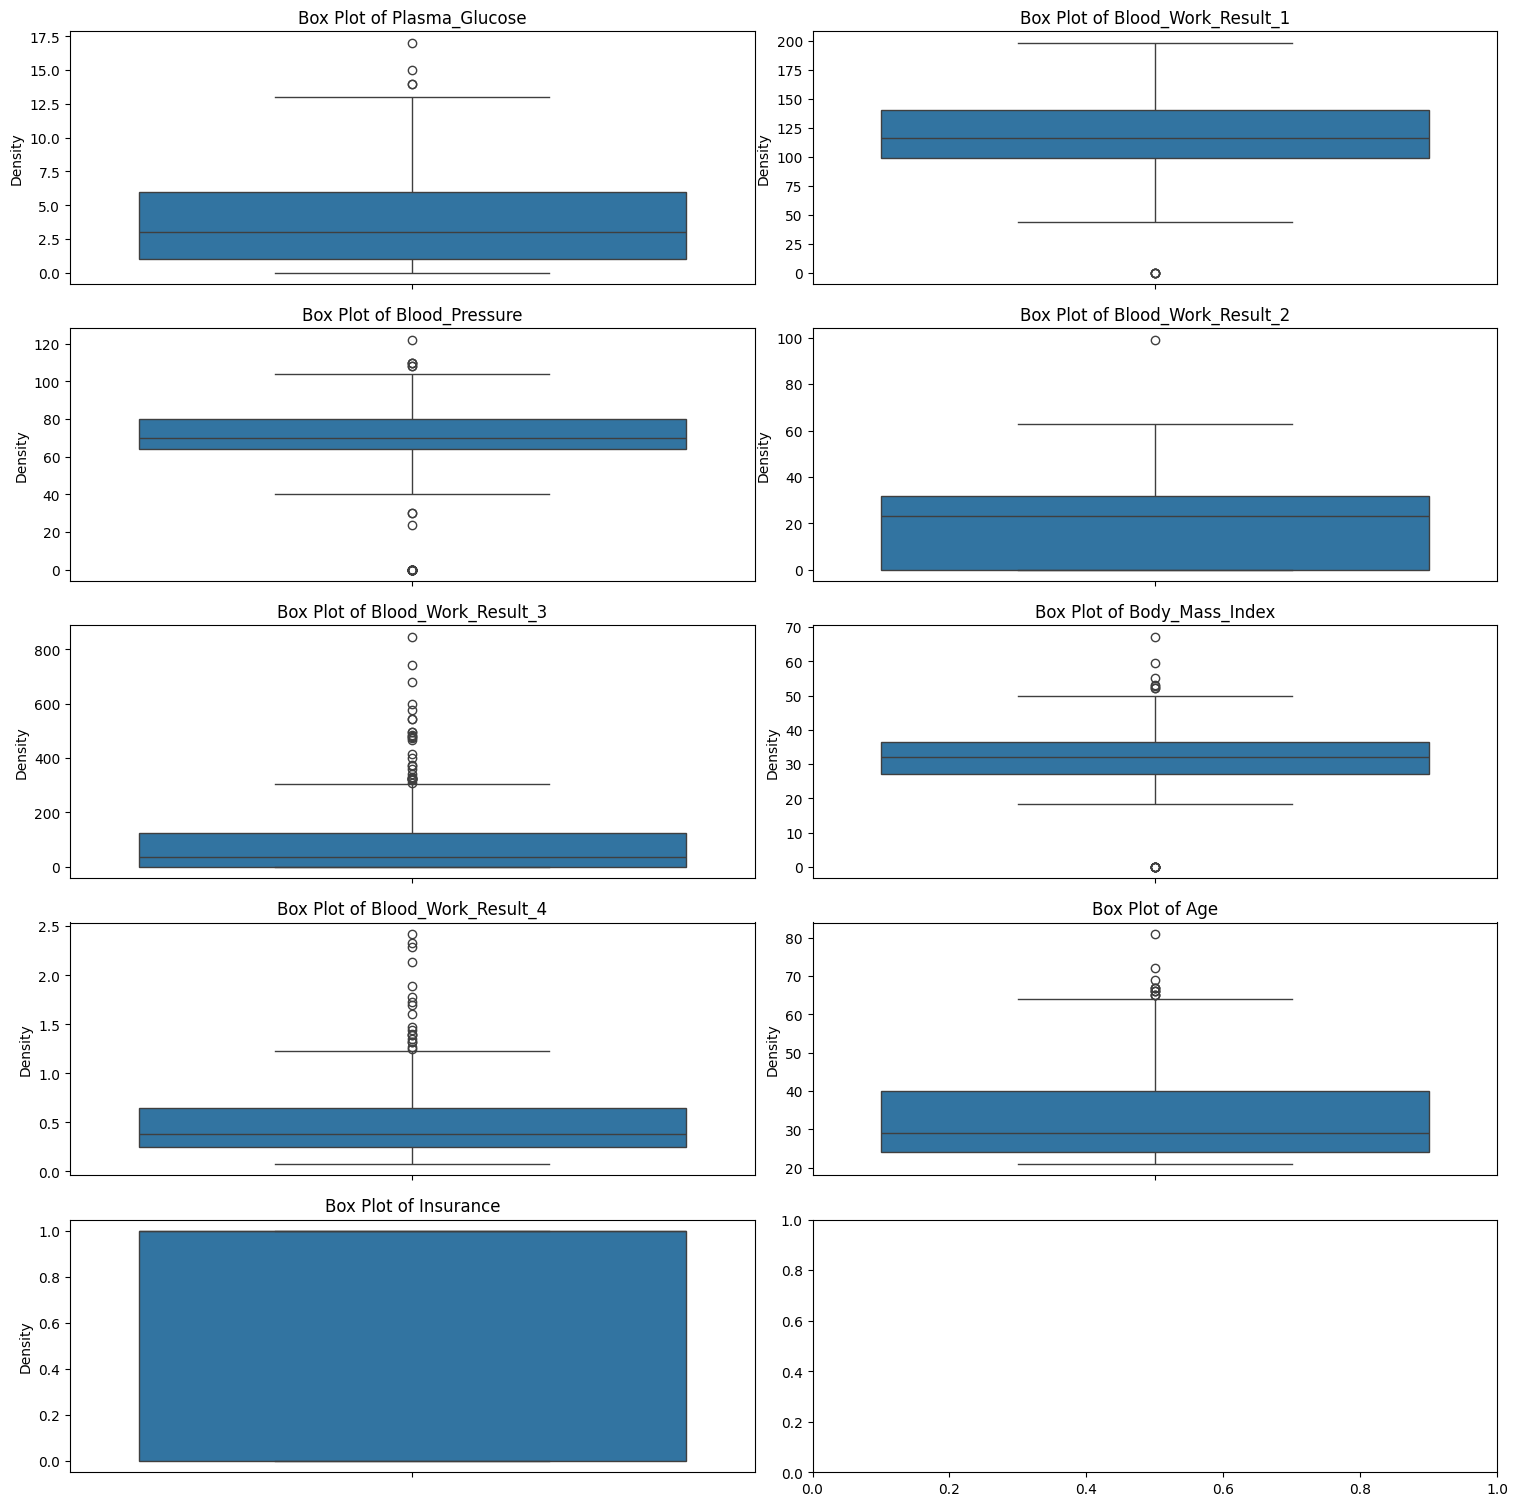

In [14]:
# set the number of rows and columns for subplot
num_rows, num_columns = 5,2
fig,axes =plt.subplots(num_rows,num_columns,figsize=(15,15))
fig.tight_layout()

# flatten axes
axes = axes.flatten()
for id,column in enumerate(df.columns):
    if df[column].dtype in ['int64','float64']:
        sns.boxplot(df[column], ax=axes[id])
        axes[id].set_title(f"Box Plot of {column}")
        axes[id].set_ylabel("Density")
plt.show()

The box plot visualizations depicts the presence of outliers in the data.
- The outliers will be looked at and dealt with appropriately based on stakeholders advice and the project objectives.
- The numerical columns will be scaled using various scaling methods to ensure that the data is kept in the same range.
- Log transformations will be applied too in the data preparation stage.

#### Bivariate Analysis

In [20]:
df.columns

Index(['Plasma_Glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_Mass_Index',
       'Blood_Work_Result_4', 'Age', 'Insurance', 'Sepssis'],
      dtype='object')

<Figure size 1500x1500 with 0 Axes>

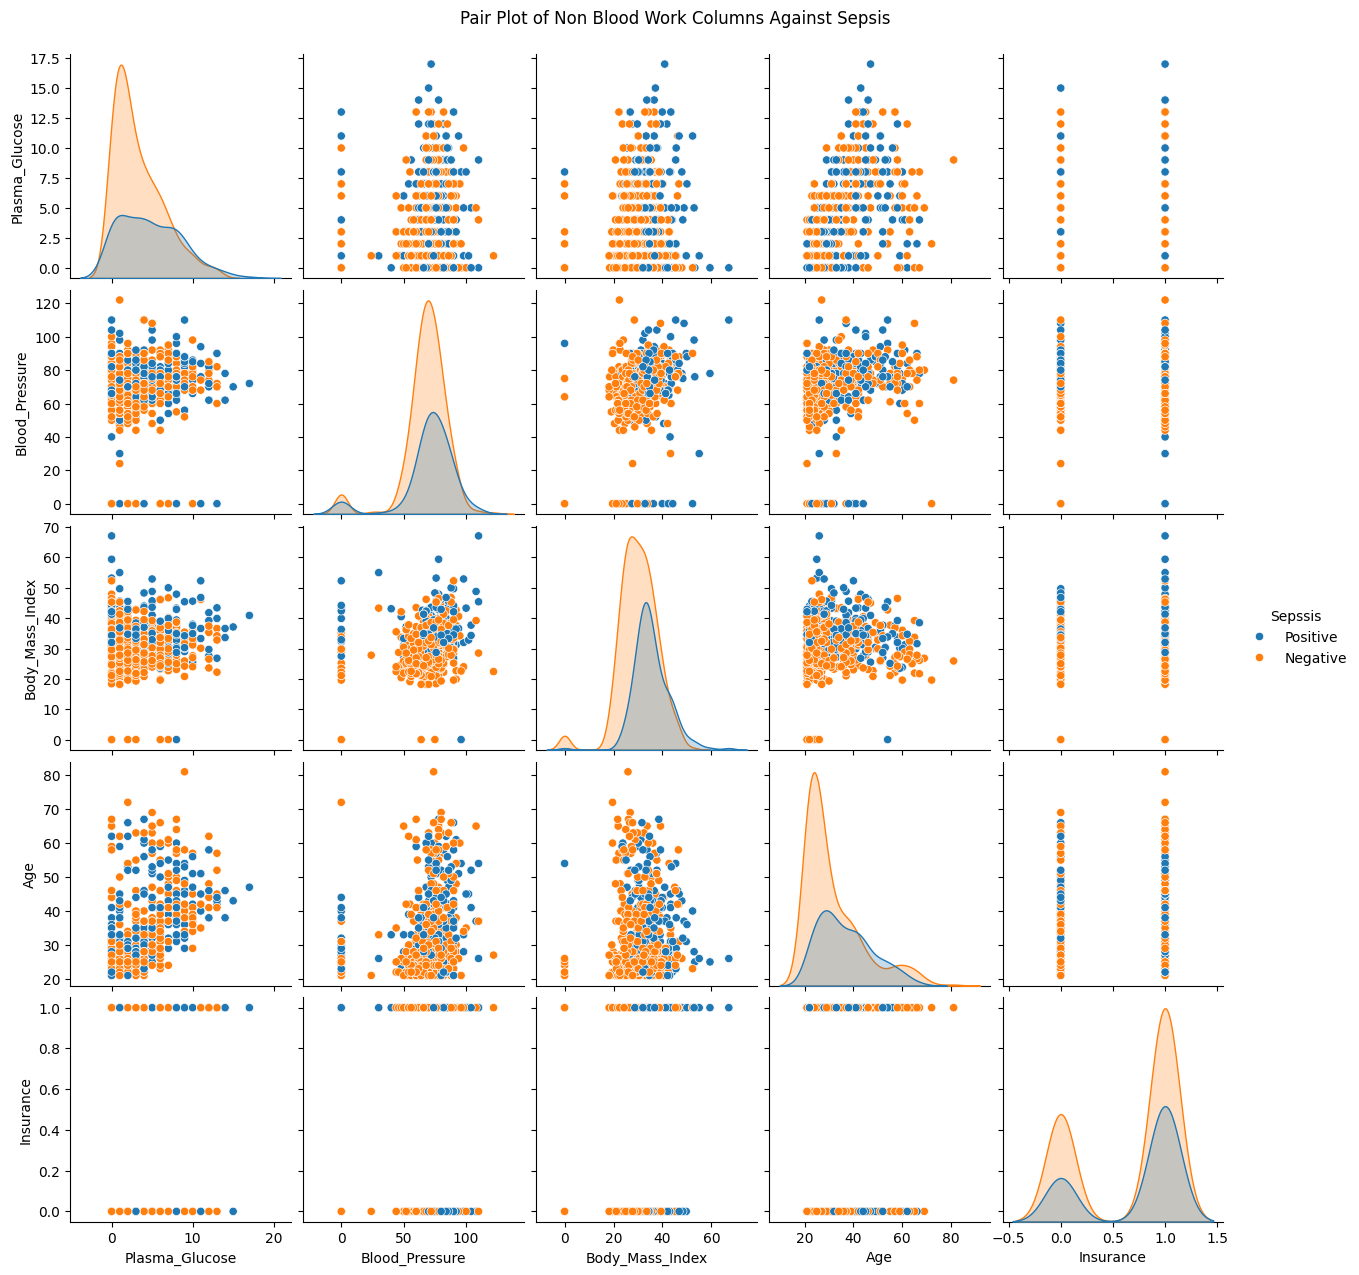

In [27]:
#  Plot pair plot for non blood work result types columns
non_blood_work = ["Plasma_Glucose","Blood_Pressure","Body_Mass_Index","Age","Insurance","Sepssis"]
plt.figure(figsize=(15,15))
sns.pairplot(df[non_blood_work], diag_kind="kde",hue="Sepssis")
plt.suptitle('Pair Plot of Non Blood Work Columns Against Sepsis', y=1.02)
plt.show()

<Figure size 1500x1500 with 0 Axes>

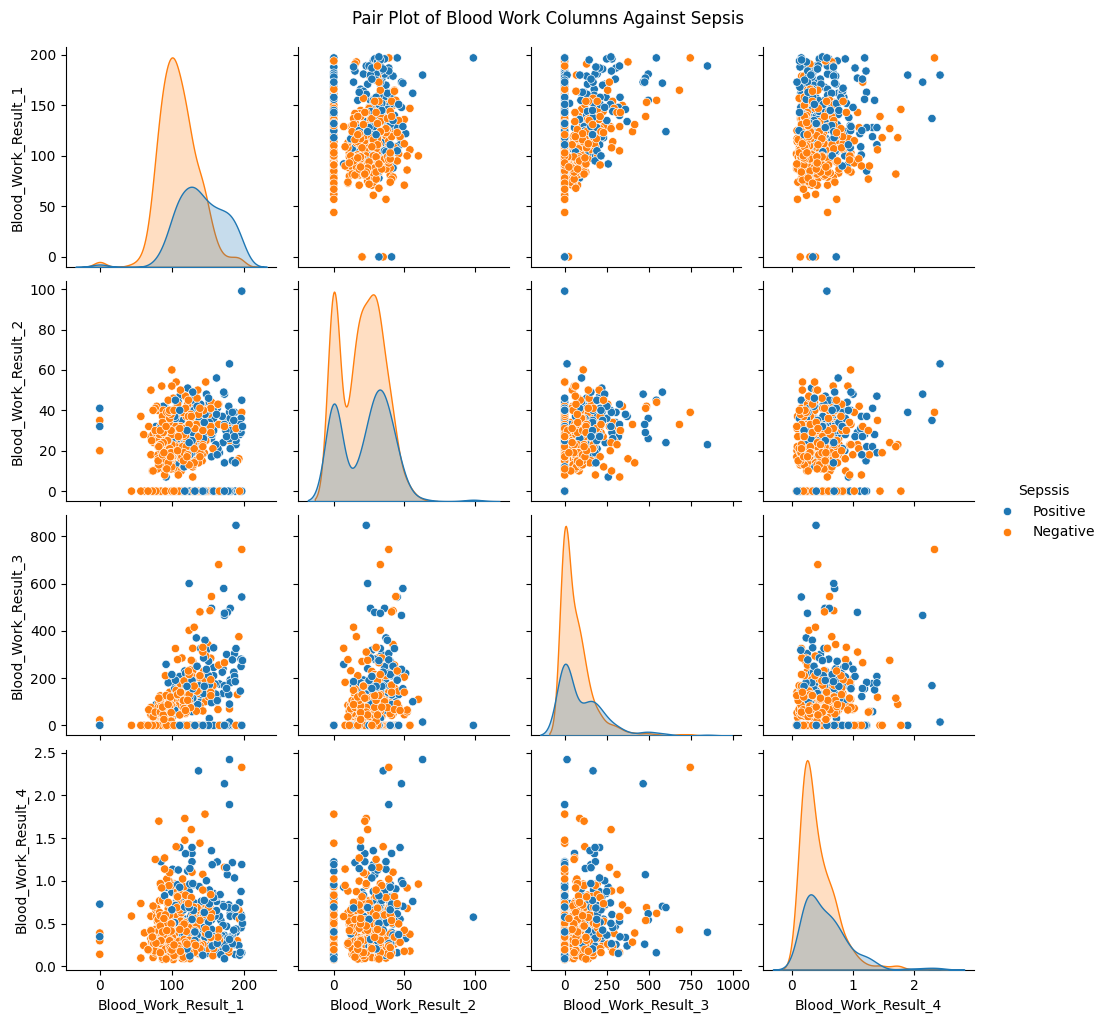

In [26]:
#  Plot pair plot for blood work result types columns against Sepssis columns
blood_work_columns = ["Blood_Work_Result_1","Blood_Work_Result_2","Blood_Work_Result_3","Blood_Work_Result_4","Sepssis"]
plt.figure(figsize=(15,15))
sns.pairplot(df[blood_work_columns], diag_kind="kde",hue="Sepssis")
plt.suptitle('Pair Plot of Blood Work Columns Against Sepsis', y=1.02)
plt.show()

#### Checking Correlation With Phik Correlation Matrix

interval columns not set, guessing: ['Plasma_Glucose', 'Blood_Work_Result_1', 'Blood_Pressure', 'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_Mass_Index', 'Blood_Work_Result_4', 'Age', 'Insurance']


<Figure size 1500x1500 with 0 Axes>

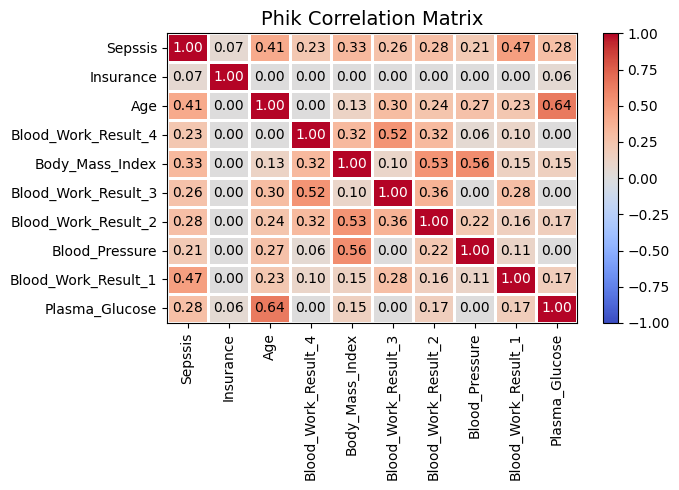

In [34]:
# plot the phik correlation matrix
plt.figure(figsize=(15,15))
corr_matrix = df.phik_matrix()
plot_correlation_matrix(corr_matrix.values,x_labels=corr_matrix.columns,color_map="coolwarm",y_labels=corr_matrix.index,title="Phik Correlation Matrix")
plt.tight_layout()
plt.show()

#### Multivariate Analysis


##### Principal Component Analysis

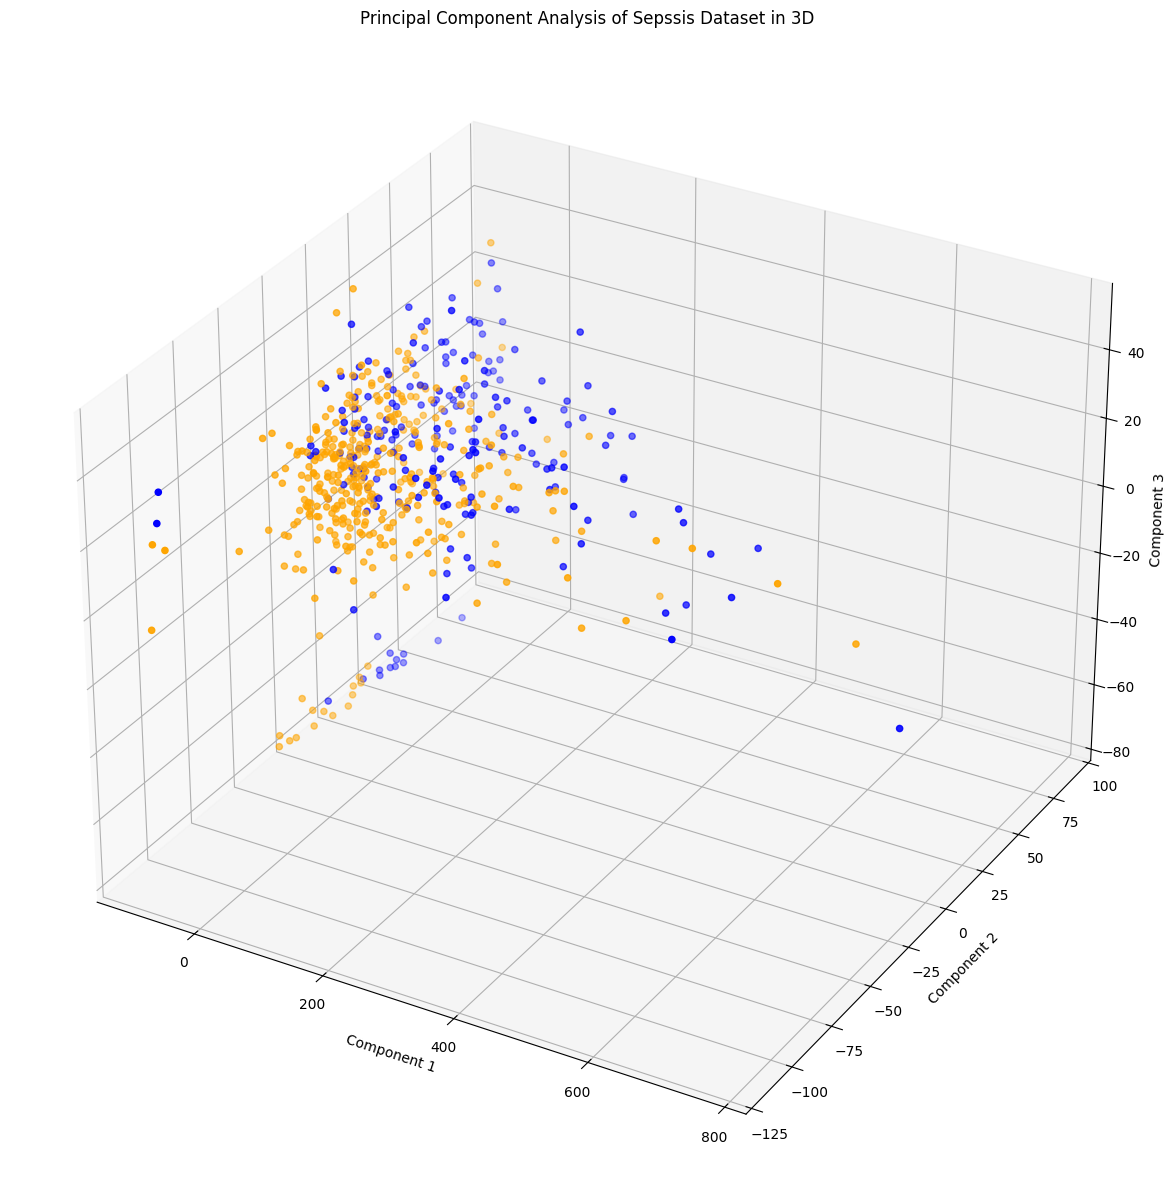

In [39]:
#Perform PCA with three dimensions
X_components = df.drop(columns="Sepssis")
y_compnents = df["Sepssis"].map(custom_palette)
pca = PCA(n_components=3)
pca_sepssis = pca.fit_transform(X_components)

# Add figure and subplots
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111,projection = "3d")

# Scatter plot of components and coloring by Sepssis
ax.scatter(pca_sepssis[:,0],pca_sepssis[:,1],pca_sepssis[:,2], c=y_compnents)

# Add labels and title
ax.set_xlabel("Component 1")
ax.set_ylabel("Component 2")
ax.set_zlabel("Component 3")
ax.set_title("Principal Component Analysis of Sepssis Dataset in 3D")
plt.show()

#### Answering The Analytical Questions

##### Question 1
Are elderly people at a higher risk of developing sepssis compared to younger individuals?

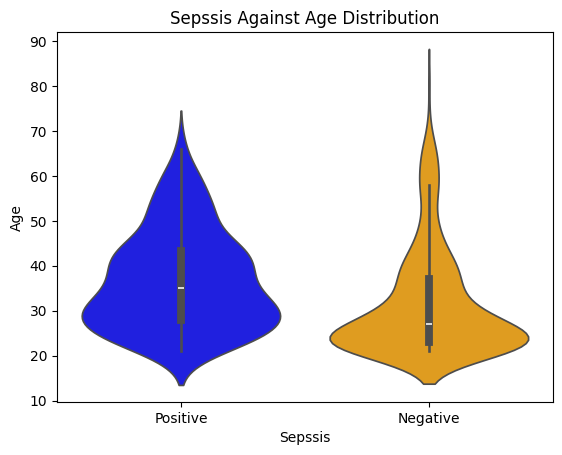

In [42]:
# Violin Plot
sns.violinplot(df,x="Sepssis",y="Age",palette=custom_palette)
plt.title("Sepssis Against Age Distribution")
plt.show()

From the violin plot above, we can see that younger people has lesser risk of being affected by the Sepsis disease as compared to elderly. Also, we can see that the median age of patients with Positive Sepssis status has is higher than those with negative status. 

##### Question 2
Are patients with a high BMI at a greater risk of developing sepssis?


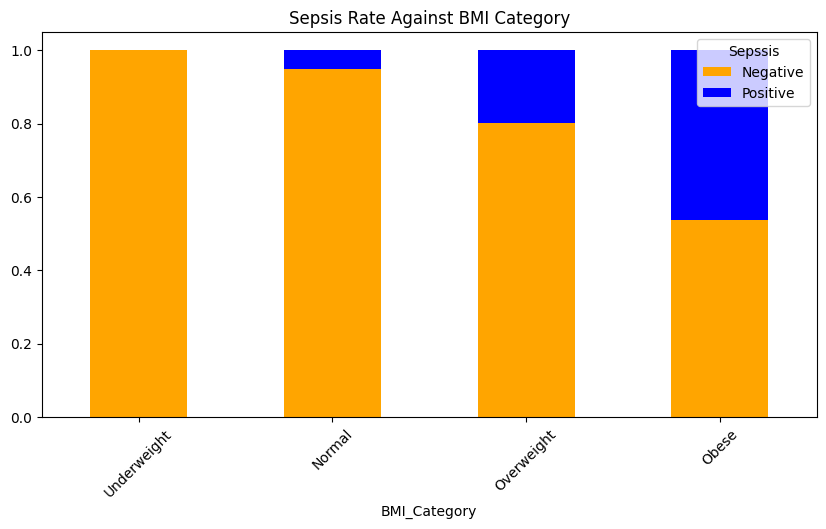

In [50]:
# Categorize BMI
df["BMI_Category"] = pd.cut(df["Body_Mass_Index"],bins=[0,18.5,24.9,29.5,float("inf")],
                            labels=["Underweight","Normal","Overweight","Obese"])

sepssis_counts = df.groupby("BMI_Category")["Sepssis"].value_counts(normalize=True).unstack()

# Plot Sepsis Rate for each BMI category
sepssis_counts.plot(kind="bar", stacked=True, figsize=(10,5), color=custom_palette)
plt.title("Sepsis Rate Against BMI Category")
plt.xticks(rotation = 45)
plt.show() 


From the bar plot above, we can see that patients with Overweight and Obese BMI categories have a higher risk of developing Sepsis disease compared to those with Underweight and Normal BMI categories. 


#### Question 3

Are patients with high blood pressure at a greater risk of developing sepssis?

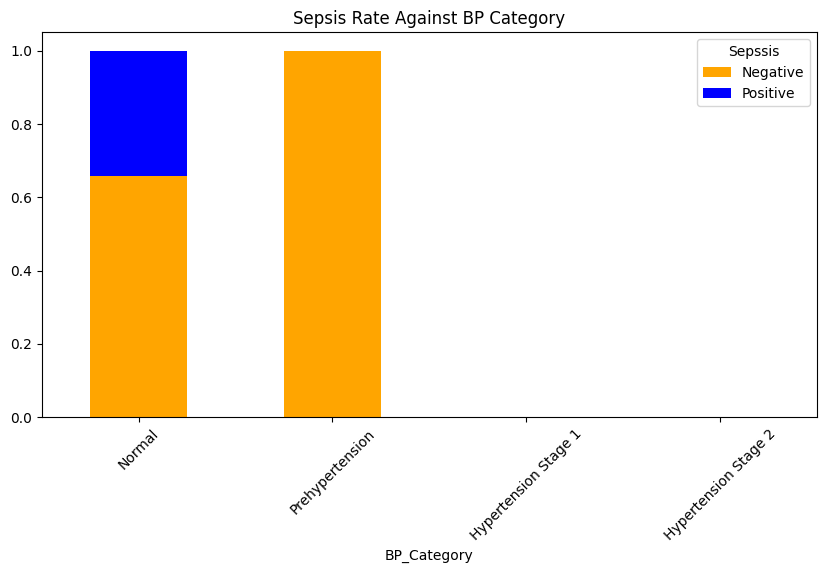

In [51]:
# Categorize BMI
df["BP_Category"] = pd.cut(df["Blood_Pressure"],bins=[0,120,129,139,float("inf")],
                            labels=["Normal","Prehypertension","Hypertension Stage 1","Hypertension Stage 2",])

sepssis_counts = df.groupby("BP_Category")["Sepssis"].value_counts(normalize=True).unstack()

# Plot Sepsis Rate for each BMI category
sepssis_counts.plot(kind="bar", stacked=True, figsize=(10,5), color=custom_palette)
plt.title("Sepsis Rate Against BP Category")
plt.xticks(rotation = 45)
plt.show() 

From the visualization above, we can see that Higher Blood Pressure isn't a major factor when it comes to risk of getting the Sepssis Disease.

#### Question 4

Are patients with high plasma glucose levels at a greater risk of developing sepssis?

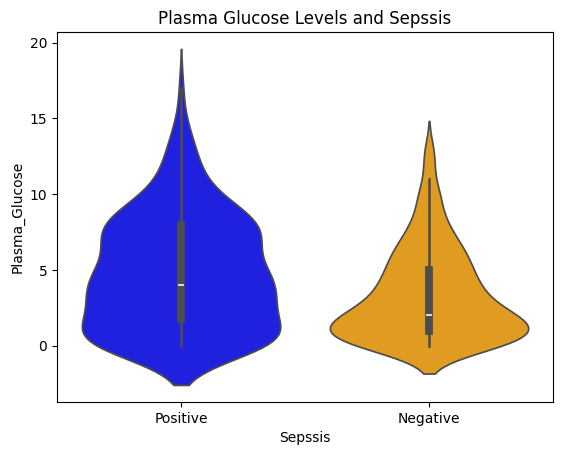

In [61]:

sns.violinplot(df,y="Plasma_Glucose",x="Sepssis",palette=custom_palette)
plt.title("Plasma Glucose Levels and Sepssis")
plt.show()

From the violin plot visualization, we can see that the median Plasma glucose levels of Sepssis patients is higher than patients with no Sepssis infection.

##### Question 5
Are patients with higher insurance coverage at a greater risk of developing sepssis?

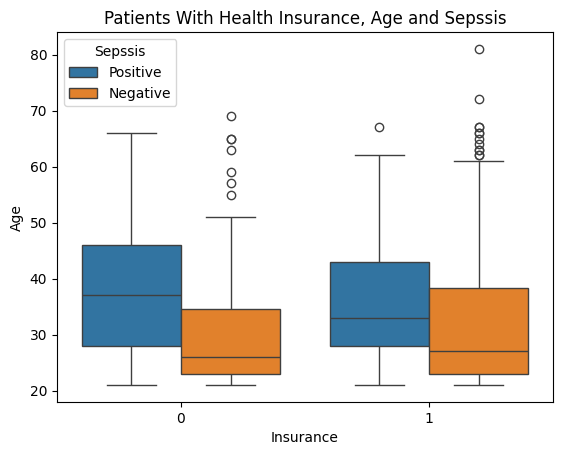

In [72]:
sns.boxplot(df,x="Insurance",y="Age",hue="Sepssis")
plt.title("Patients With Health Insurance, Age and Sepssis")
plt.show()

- The median age of patients with Sepssis are Higher than those without Sepssis.
- Patients with Health Insurance plan tend to have a lower risk of getting the Sepssis, this could be due to frequent check-ups and access to quality healthcare service.
- It is very advisable to encourage older people to subscribed to the Health Insurance plan since they are the ones at a higher risk of getting Sepssis.

#### Hypothesis Testing
`Null Hypothesis (Ho)`: There is no correlation between old age and individual's likelihood of developing sepssis.
`Altenatenate Hypothesis (Ha)`: There is a statistically significant correlation between old age and individual's likelihood of developing sepssis.

In [76]:
# Calculate the Spearman's Rank Correlation 
corr, p_value = spearmanr(df["Age"],df["Sepssis"])

# Print the results
print(f"Correlation: {corr}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("We reject the null hypothesis, there is a statistically significant correlation between old age and individual's likelihood of developing sepssis.")
else:
    print("We fail to reject the null hypothesis, there is no statistically significant correlation between old age and individual's likelihood of developing sepssis.")

Correlation: 0.28775208051817225
P-value: 6.956664638525152e-13
We reject the null hypothesis, there is a statistically significant correlation between old age and individual's likelihood of developing sepssis.


##### Key Insights About Data
- The dataset contains 599 rows and 11 columns
- There are no missing values or duplicates
- The features are not evenly distributed
- There are outliers in the dataset which may affect how we impute missing values.
- There is a general positive correlation between all the features and the target variable
- The null hypothesis has been rejected

#### Data Preparation

##### Check if Dataset is Balanced 

In [78]:
# Check if dataset is balanced
df["Sepssis"].value_counts()

Sepssis
Negative    391
Positive    208
Name: count, dtype: int64

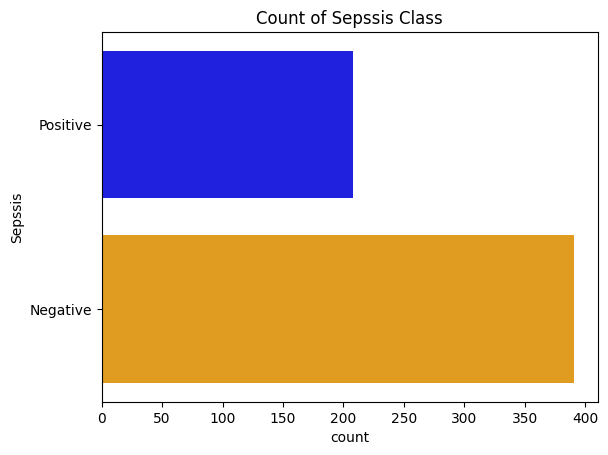

In [80]:
# countplot of target variable
sns.countplot(df["Sepssis"],palette=custom_palette)
plt.title("Count of Sepssis Class")
plt.show()

#### Train Test Split & Encode Target Variable

In [92]:
# Split data into X(features) and y(target)
X = df.drop(columns=["Sepssis","BMI_Category","BP_Category"],axis=1)
y = df["Sepssis"]

In [93]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [94]:
# Check the shape of the train test dataset
print(f"Size of trraining dataset: {X_train.shape}")

print(f"Size of test dataset: {X_test.shape}")


Size of trraining dataset: (479, 9)
Size of test dataset: (120, 9)


In [95]:
# Encode the target variable
encoder = LabelEncoder()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.fit_transform(y_test)


In [97]:
# Get the input features
input_features = X.columns

input_features

Index(['Plasma_Glucose', 'Blood_Work_Result_1', 'Blood_Pressure',
       'Blood_Work_Result_2', 'Blood_Work_Result_3', 'Body_Mass_Index',
       'Blood_Work_Result_4', 'Age', 'Insurance'],
      dtype='object')

#### Preprocessor Pipeline


In [101]:
preprocessor = ColumnTransformer(
    transformers=(
        ("imputer",SimpleImputer(strategy="median"),input_features),
        ("scaler",RobustScaler(),input_features),
        ("log_transformer",FunctionTransformer(np.log1p),input_features)
    )
)

#### Modeling and Evaluation

In [ ]:
# Create a list of models to use
models = [
    
]